<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/Mortality_and_Water_2_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors

from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import matplotlib.pyplot as plot
import statsmodels.formula.api as smf

In [2]:
url_data = r'https://raw.githubusercontent.com/svetaepc/ds_py/master/data/water.csv'
df = pd.read_csv(url_data)
df.sample(5)

,Unnamed: 0,location,town,mortality,hardness
30,31,North,Middlesbrough,1704,26
14,15,South,Croydon,1254,96
33,34,South,Northampton,1309,59
13,14,South,Coventry,1307,78
9,10,South,Brighton,1359,84


In [5]:
df.describe
df.isna().sum()

Unnamed: 0    0
location      0
town          0
mortality     0
hardness      0
dtype: int64

In [7]:
#
rho, p = spearmanr(df['hardness'], df['mortality'])

#ранговая корреляция Спирмена и p-значение
print(rho)

# -0.6316646189166502

print(p)

# -0.6316646189166502
# 4.79546153722838e-08
# поскольку p-значение корреляции меньше 0,05, корреляция является статистически значимой

-0.6316646189166502
4.79546153722838e-08


In [9]:
# 
spearmanr(df['hardness'], df['mortality'])[0]

-0.6316646189166502

In [10]:
# Это указывает на наличие отрицательной корреляции между жёсткостью воды и смертностью
# Чем дальше коэффициент корреляции от нуля, тем сильнее Связь между двумя переменными.

In [11]:
np.corrcoef(df['hardness'], df['mortality'])[0,1]

-0.6548486232042463

In [13]:
from scipy.stats.stats import pearsonr

pearsonr(df['hardness'], df['mortality'])
# Поскольку это значение p меньше 0,05, мы можем заключить, что существует статистически значимая корреляция между двумя переменными.

(-0.6548486232042466, 1.0331339260349462e-08)

In [14]:
#создать корреляционную матрицу
df.corr()

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


In [15]:
df.corr().round(3)

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000,0.077,0.123
mortality,0.077,1.000,-0.655
hardness,0.123,-0.655,1.000


In [16]:

#define response variable
y = df['mortality']

#define predictor variables
X = df[['hardness']]

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.03e-08
Time:                        19:24:01   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

In [17]:
# Вариант 2
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('mortality ~ hardness + location', data=df)
model = model.fit()

print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     41.86
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           5.60e-12
Time:                        19:27:22   Log-Likelihood:                -378.12
No. Observations:                  61   AIC:                             762.2
Df Residuals:                      58   BIC:                             768.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1695.4371     25.32

In [27]:
X.shape
y.shape
X

,const,hardness
0,1.0,105
1,1.0,17
2,1.0,5
3,1.0,14
4,1.0,18
...,...,...
56,1.0,60
57,1.0,53
58,1.0,122
59,1.0,81


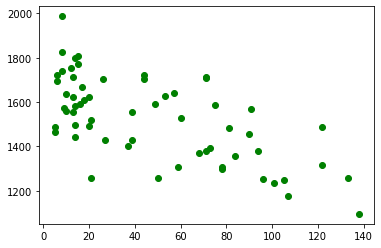

In [28]:
plt.scatter(df['hardness'], df['mortality'],color='g') 

# plt.plot(X_test, y_pred,color='k') 



plt.show()

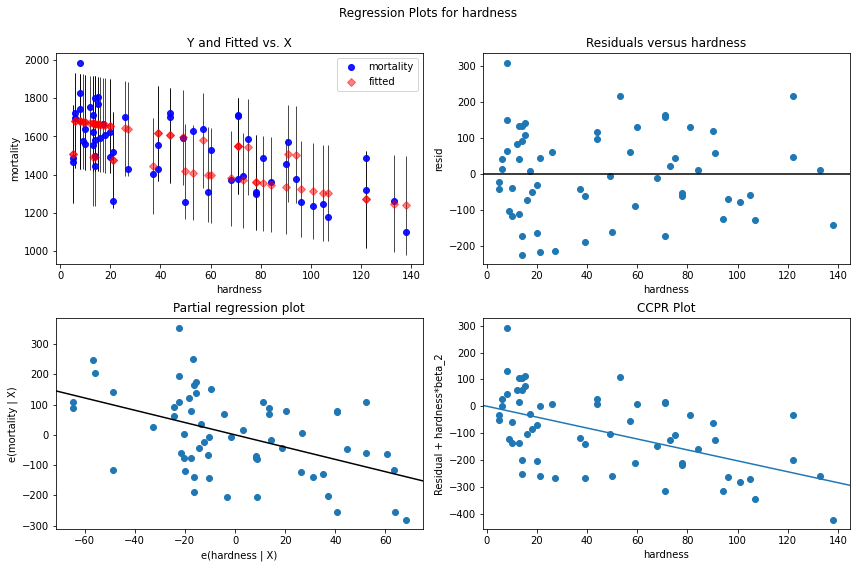

In [19]:
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'hardness', fig=fig)

In [ ]:
# гетероскедастичность не является проблемой ни для одной из переменных в модели

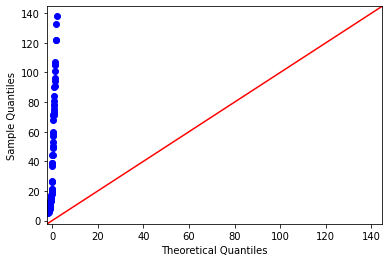

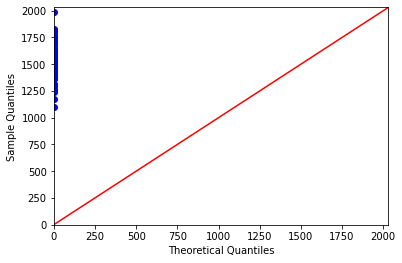

In [23]:
# квантильный-квантильный» график

fig = sm.qqplot(df['hardness'], line='45')
fig = sm.qqplot(df['mortality'], line='45')
plt.show()

In [ ]:
# данные не следуют нормальному распределению

In [29]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


In [36]:
df.shape

(61, 5)

In [37]:
dfs = df[df.location == 'South']
dfn = df[df.location == 'North']
dfs.shape
dfn.shape

(35, 5)

In [38]:
Xs = dfs['hardness']
ys = dfs['mortality']

pearsonr(Xs, ys)

(-0.6021532715484159, 0.0011346743048161897)

In [39]:
Xn = dfn['hardness']
yn = dfn['mortality']

pearsonr(Xn, yn)

(-0.36859783832887183, 0.029344659047110602)

In [40]:
rho, p = spearmanr(dfs['hardness'], dfs['mortality'])

#напечатать ранговая корреляция Спирмена и p-значение
print(rho)

# 

print(p)

-0.5957229185013566
0.0013223867410179474


In [41]:
rho, p = spearmanr(dfn['hardness'], dfn['mortality'])

#напечатать ранговая корреляция Спирмена и p-значение
print(rho)

# 

print(p)

-0.4042078956511175
0.01602900609606112


In [44]:
model = smf.ols('mortality ~ hardness', data=dfs)
model = model.fit()

print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sat, 14 Jan 2023   Prob (F-statistic):            0.00113
Time:                        20:12:27   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1522.8150     45.431     33.519      0.0

In [45]:
model = smf.ols('mortality ~ hardness', data=dfn)
model = model.fit()

print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Sat, 14 Jan 2023   Prob (F-statistic):             0.0293
Time:                        20:12:36   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1692.3128     33.785     50.091      0.0

In [47]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [60]:
# Можно предположить - Зависимость смертность ~ жесткость воды - сильнее в южном регионе
# R-squared - 0.363 а в северных  R-squared - 0.136


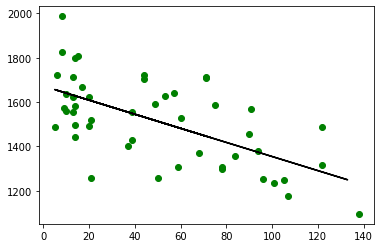

In [59]:
X = df.iloc[:, 4].values.reshape(-1,1) 

y = df.iloc[:,3].values.reshape(-1,1)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 

regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 

plt.show()



In [62]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 84.85181793084118
Mean Squared Error: 10379.339028393155
Root Mean Squared Error: 101.87904116349523


In [68]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 84.85
Mean squared error = 10379.34
Median absolute error = 69.85
Explain variance score = 0.61
R2 score = 0.61


Средняя абсолютная ошибка : это среднее значение абсолютных ошибок всех точек данных в данном наборе данных.

Среднеквадратическая ошибка : это среднее квадратов ошибок всех точек данных в данном наборе данных. Это один из самых популярных показателей!

Средняя абсолютная ошибка : это медиана всех ошибок в данном наборе данных. Основное преимущество этой метрики заключается в том, что она устойчива к выбросам. Одна плохая точка в тестовом наборе данных не исказила бы всю метрику ошибки, в отличие от метрики средней ошибки.

Объясненная оценка дисперсии : эта оценка измеряет, насколько хорошо наша модель может учитывать вариации в нашем наборе данных. Оценка 1,0 означает, что наша модель идеальна.

Оценка R2 : это произносится как R-квадрат, и эта оценка относится к коэффициенту детерминации. Это говорит нам, насколько хорошо наша модель будет предсказывать неизвестные образцы. Наилучший возможный балл — 1,0, но он может быть и отрицательным.

In [64]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


Вы можете видеть, что значение среднеквадратичной ошибки составляет 10379, что составляет около 25% от среднего значения процента жёсткости. Это означает, что наш алгоритм работает. Но конечно существуют другие метрики, кроме жёсткости воды, более точно объясняющие величины смертности.
